In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
#%matplotlib notebook
%autosave 0
 
import numpy as np
from matplotlib import rcParams
import matplotlib.pyplot as plt
import corner

rcParams["font.size"] = 16
rcParams["font.family"] = "sans-serif"
rcParams["font.sans-serif"] = ["Computer Modern Sans"]
rcParams["text.usetex"] = True
rcParams["text.latex.preamble"] = r"\usepackage{cmbright}"

Autosave disabled


/opt/scalesdk/envs/mpy/lib/python2.7/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family [u'sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


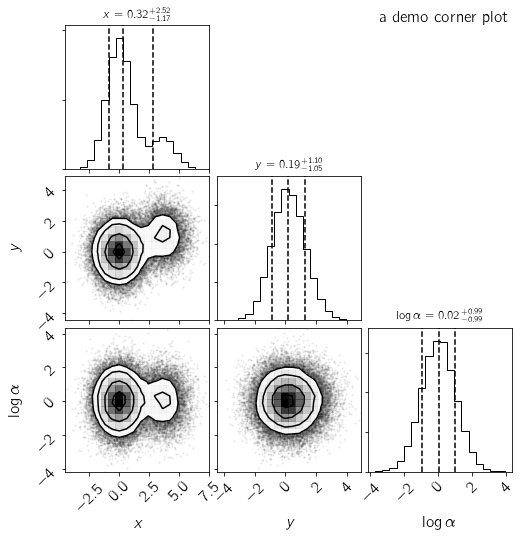

In [2]:
np.random.seed(42)

# Set up the parameters of the problem.
ndim, nsamples = 3, 50000

# Generate some fake data.
data1 = np.random.randn(ndim * 4 * nsamples / 5).reshape([4 * nsamples / 5,
                                                          ndim])
data2 = (4 * np.random.rand(ndim)[None, :] +
         np.random.randn(ndim * nsamples / 5).reshape([nsamples / 5, ndim]))
data = np.vstack([data1, data2])

# Plot it.
figure = corner.corner(data, labels=[r"$x$", r"$y$", r"$\log \alpha$",
                                     r"$\Gamma \, [\mathrm{parsec}]$"],
                       quantiles=[0.16, 0.5, 0.84],
                       show_titles=True, title_kwargs={"fontsize": 12})
figure.gca().annotate("a demo corner plot",
                      xy=(1.0, 1.0), xycoords="figure fraction",
                      xytext=(-20, -10), textcoords="offset points",
                      ha="right", va="top")
figure.savefig("demo.png", dpi=300)

In [3]:
plt.show()

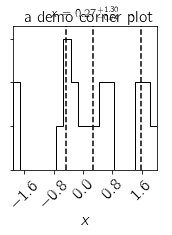

In [4]:
np.random.seed(42)

# Set up the parameters of the problem.
ndim, nsamples = 1, 20

# Generate some fake data.
data1 = np.random.randn(ndim * 4 * nsamples / 5).reshape([4 * nsamples / 5,
                                                          ndim])
data2 = (4 * np.random.rand(ndim)[None, :] +
         np.random.randn(ndim * nsamples / 5).reshape([nsamples / 5, ndim]))
data = np.vstack([data1, data2])

# Plot it.
figure = corner.corner(data, labels=[r"$x$", r"$y$", r"$\log \alpha$",
                                     r"$\Gamma \, [\mathrm{parsec}]$"],
                       quantiles=[0.16, 0.5, 0.84],
                       show_titles=True, title_kwargs={"fontsize": 12})
figure.gca().annotate("a demo corner plot",
                      xy=(1.0, 1.0), xycoords="figure fraction",
                      xytext=(-20, -10), textcoords="offset points",
                      ha="right", va="top")
plt.show()

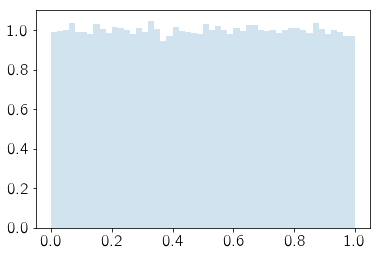

In [5]:
import scipy.stats
r = scipy.stats.uniform.rvs(size=100000)
fig, ax = plt.subplots(1, 1)
p=ax.hist(r, bins=50, density=True, histtype='stepfilled', alpha=0.2)

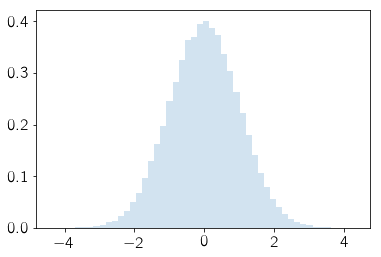

In [6]:
g = scipy.stats.norm.ppf(r)
fig, ax = plt.subplots(1, 1)
p=ax.hist(g, bins=50, density=True, histtype='stepfilled', alpha=0.2)

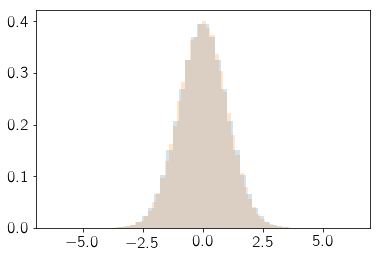

In [7]:
g = scipy.stats.norm.ppf(r)
e = scipy.stats.norm.ppf(np.linspace(1e-10,1-1e-10,10000))
fig, ax = plt.subplots(1, 1)
p=ax.hist(e, bins=50, density=True, histtype='stepfilled', alpha=0.2)
p=ax.hist(g, bins=50, density=True, histtype='stepfilled', alpha=0.2)


In [31]:
import phuzzy as ph
import phuzzy.mpl as phm
import phuzzy.mpl.plots

True

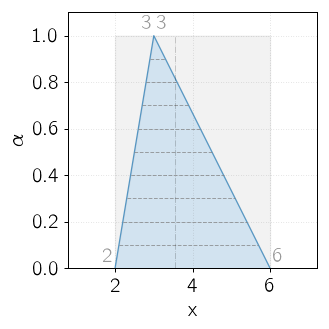

In [9]:
t = phm.Triangle(alpha0=[2,6], alpha1=[3])
t.plot()

In [10]:
t.ppf([0, 2,3,4,6])

array([2., 1., 1., 1., 1.])

array([2., 1., 1., 1., 1.])

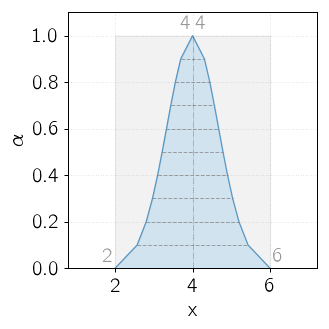

In [11]:
t = phm.TruncNorm(alpha0=[2,6], alpha1=[3])
t.plot()
t.ppf([0, 2,3,4,6])

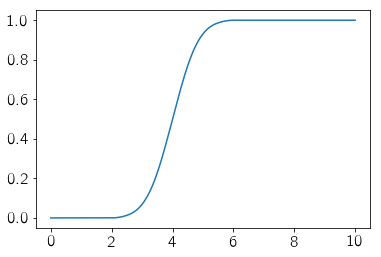

In [12]:
fig, ax = plt.subplots(1, 1)
x = np.linspace(0,10,1000)
y = t.cdf(x)
ax.plot(x,y)

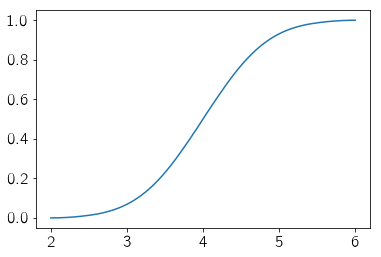

In [13]:
# t = phm.Triangle(alpha0=[2,6], alpha1=[3])
t = phm.TruncNorm(alpha0=[2,6], alpha1=[3])
fig, ax = plt.subplots(1, 1)
x = np.linspace(0,10,1000)
p = t.cdf(x)
# p = np.linspace(0,1,1000)
xp = t.ppf(p)
ax.plot(xp,p)

True

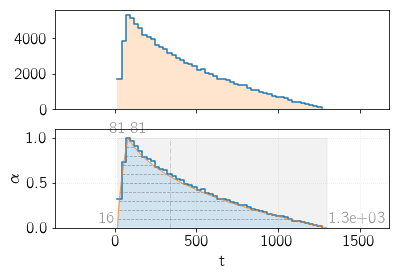

In [14]:
t = phm.Triangle(alpha0=[2,6], alpha1=[3])**4
t.name="t"
phm.mix_mpl(t)
# t = phm.TruncNorm(alpha0=[2,6], alpha1=[3])
r = scipy.stats.uniform.rvs(size=100000)
xp = t.ppf(r)
fig, axs = plt.subplots(2, 1, sharex=True)
hy, hx = np.histogram(xp, bins=50)
# print(hy, hx)
axs[0].step(hx[:-1], hy, where='post')
hyn = hy/float(hy.max())
axs[1].step(hx[:-1], hyn, where='post')
p=axs[0].hist(xp, bins=50, density=False, histtype='stepfilled', alpha=0.2)
t.plot(ax=axs[1])

True

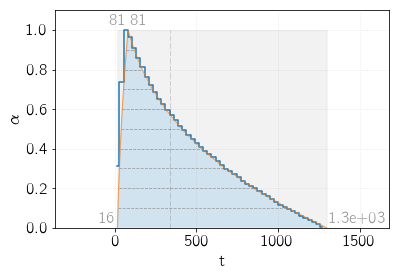

In [23]:
t = phm.Triangle(alpha0=[2,6], alpha1=[3])**4
t.name="t"
phm.mix_mpl(t)
xp = t.rvs(1000000)
fig, ax = plt.subplots(1, 1, sharex=True)
hy, hx = np.histogram(xp, bins=50)
hyn = hy/float(hy.max())
ax.step(hx[:-1], hyn, where='mid')
t.plot(ax=ax)


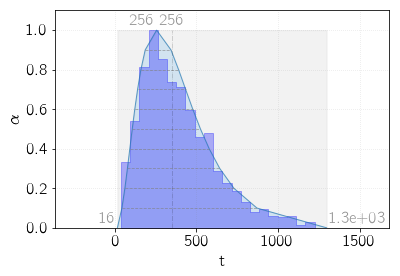

In [60]:
t = phm.TruncNorm(alpha0=[2,6], alpha1=[3])**4
t.name="t"
phm.mix_mpl(t)
xp = t.rvs(1000, seed=10)
fig, ax = plt.subplots(1, 1, sharex=True)
t.plot(ax=ax)
_ = phuzzy.mpl.plots.plot_hist(xp, ax=ax, normed=True, color="b", filled=True, alpha=.3)